# 第2章: グラフの基本操作

## 学習目標
- ノードの追加・削除を習得する
- エッジの追加・削除を習得する
- グラフの検査方法を学ぶ
- イテレーション処理を理解する

## 難易度: 初級〜中級

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.rcParams['font.sans-serif'] = ['IPAexGothic'] + plt.rcParams['font.sans-serif']
%matplotlib inline

---
## 2.1 ノードの操作

### 2.1.1 ノードの追加

In [2]:
G = nx.Graph()

# 単一ノードの追加
G.add_node(1)
G.add_node("Tokyo")
G.add_node(3.14)

print(f"ノード一覧: {list(G.nodes())}")

ノード一覧: [1, 'Tokyo', 3.14]


In [3]:
# 複数ノードの一括追加
G.add_nodes_from([2, 3, 4, 5])
print(f"ノード一覧: {list(G.nodes())}")

ノード一覧: [1, 'Tokyo', 3.14, 2, 3, 4, 5]


In [4]:
# 別のグラフからノードを追加
H = nx.path_graph(5)  # 0-1-2-3-4 のパスグラフ
print(f"グラフHのノード: {list(H.nodes())}")

G2 = nx.Graph()
G2.add_nodes_from(H)
print(f"G2のノード: {list(G2.nodes())}")

グラフHのノード: [0, 1, 2, 3, 4]
G2のノード: [0, 1, 2, 3, 4]


In [5]:
# 文字列からノードを追加（各文字がノードになる）
G3 = nx.Graph()
G3.add_nodes_from("hello")
print(f"文字列からのノード: {list(G3.nodes())}")

文字列からのノード: ['h', 'e', 'l', 'o']


### 2.1.2 ノードとして使用できるオブジェクト

ノードには**ハッシュ可能（hashable）**な任意のPythonオブジェクトを使用できます。

**注意**: `None`はノードとして使用できません。

In [6]:
G = nx.Graph()

# 様々な型をノードとして使用
G.add_node(1)                    # 整数
G.add_node("city")               # 文字列
G.add_node((1, 2))               # タプル
G.add_node(frozenset([1, 2, 3])) # frozenset

print("様々なノードタイプ:")
for node in G.nodes():
    print(f"  {node} (type: {type(node).__name__})")

様々なノードタイプ:
  1 (type: int)
  city (type: str)
  (1, 2) (type: tuple)
  frozenset({1, 2, 3}) (type: frozenset)


In [7]:
# Noneは使用不可
try:
    G.add_node(None)
except Exception as e:
    print(f"エラー: Noneはノードとして使用できません")

エラー: Noneはノードとして使用できません


### 2.1.3 ノードの削除

In [8]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5)])

print(f"削除前のノード: {list(G.nodes())}")
print(f"削除前のエッジ: {list(G.edges())}")

削除前のノード: [1, 2, 3, 4, 5]
削除前のエッジ: [(1, 2), (2, 3), (3, 4), (4, 5)]


In [9]:
# 単一ノードの削除（接続するエッジも自動削除）
G.remove_node(3)
print(f"ノード3削除後のノード: {list(G.nodes())}")
print(f"ノード3削除後のエッジ: {list(G.edges())}")

ノード3削除後のノード: [1, 2, 4, 5]
ノード3削除後のエッジ: [(1, 2), (4, 5)]


In [10]:
# 複数ノードの一括削除
G.remove_nodes_from([4, 5])
print(f"複数削除後のノード: {list(G.nodes())}")

複数削除後のノード: [1, 2]


In [11]:
# すべてのノードを削除
G.clear()
print(f"クリア後のノード数: {G.number_of_nodes()}")

クリア後のノード数: 0


---
## 2.2 エッジの操作

### 2.2.1 エッジの追加

In [12]:
G = nx.Graph()

# 単一エッジの追加（ノードは自動的に追加される）
G.add_edge(1, 2)
print(f"ノード: {list(G.nodes())}")
print(f"エッジ: {list(G.edges())}")

ノード: [1, 2]
エッジ: [(1, 2)]


In [13]:
# 複数エッジの一括追加
G.add_edges_from([(2, 3), (3, 4), (4, 5), (5, 1)])
print(f"エッジ一覧: {list(G.edges())}")

エッジ一覧: [(1, 2), (1, 5), (2, 3), (3, 4), (4, 5)]


In [14]:
# タプルのリストからエッジを追加
edge_list = [("A", "B"), ("B", "C"), ("C", "D")]
G.add_edges_from(edge_list)
print(f"すべてのノード: {list(G.nodes())}")
print(f"すべてのエッジ: {list(G.edges())}")

すべてのノード: [1, 2, 3, 4, 5, 'A', 'B', 'C', 'D']
すべてのエッジ: [(1, 2), (1, 5), (2, 3), (3, 4), (4, 5), ('A', 'B'), ('B', 'C'), ('C', 'D')]


In [15]:
# 重み付きエッジの追加
G.add_edge("A", "D", weight=5.0)
G.add_edges_from([(1, "A", {"weight": 3.0}), (2, "B", {"weight": 2.0})])

print("重み付きエッジ:")
for u, v, data in G.edges(data=True):
    if 'weight' in data:
        print(f"  {u} - {v}: weight={data['weight']}")

重み付きエッジ:
  1 - A: weight=3.0
  2 - B: weight=2.0
  A - D: weight=5.0


### 2.2.2 エッジの削除

In [16]:
G = nx.complete_graph(5)  # 完全グラフ（すべてのノードが接続）
print(f"エッジ数: {G.number_of_edges()}")
print(f"エッジ: {list(G.edges())}")

エッジ数: 10
エッジ: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


In [17]:
# 単一エッジの削除
G.remove_edge(0, 1)
print(f"削除後のエッジ数: {G.number_of_edges()}")

削除後のエッジ数: 9


In [18]:
# 複数エッジの一括削除
G.remove_edges_from([(0, 2), (0, 3)])
print(f"複数削除後のエッジ数: {G.number_of_edges()}")

複数削除後のエッジ数: 7


---
## 2.3 グラフの検査

In [19]:
# サンプルグラフの作成
G = nx.karate_club_graph()  # 有名な空手クラブグラフ
print(f"空手クラブグラフ - ノード数: {G.number_of_nodes()}, エッジ数: {G.number_of_edges()}")

空手クラブグラフ - ノード数: 34, エッジ数: 78


### 2.3.1 ノードの確認

In [20]:
# ノードの存在確認
print(f"ノード0は存在するか: {0 in G}")
print(f"ノード0は存在するか: {G.has_node(0)}")
print(f"ノード100は存在するか: {100 in G}")

ノード0は存在するか: True
ノード0は存在するか: True
ノード100は存在するか: False


In [21]:
# ノードの次数
print(f"ノード0の次数: {G.degree(0)}")
print(f"ノード33の次数: {G.degree(33)}")

ノード0の次数: 16
ノード33の次数: 17


In [22]:
# 全ノードの次数を取得
degrees = dict(G.degree())
print("各ノードの次数（上位10件）:")
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]
for node, deg in sorted_degrees:
    print(f"  ノード {node}: {deg}")

各ノードの次数（上位10件）:
  ノード 33: 17
  ノード 0: 16
  ノード 32: 12
  ノード 2: 10
  ノード 1: 9
  ノード 3: 6
  ノード 31: 6
  ノード 8: 5
  ノード 13: 5
  ノード 23: 5


### 2.3.2 エッジの確認

In [23]:
# エッジの存在確認
print(f"エッジ(0, 1)は存在するか: {G.has_edge(0, 1)}")
print(f"エッジ(0, 33)は存在するか: {G.has_edge(0, 33)}")

エッジ(0, 1)は存在するか: True
エッジ(0, 33)は存在するか: False


In [24]:
# 隣接ノード（neighbors）の取得
print(f"ノード0の隣接ノード: {list(G.neighbors(0))}")

ノード0の隣接ノード: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]


In [25]:
# 隣接情報（adjacency）の確認
print("ノード0の隣接情報:")
print(dict(G.adj[0]))

ノード0の隣接情報:
{1: {'weight': 4}, 2: {'weight': 5}, 3: {'weight': 3}, 4: {'weight': 3}, 5: {'weight': 3}, 6: {'weight': 3}, 7: {'weight': 2}, 8: {'weight': 2}, 10: {'weight': 2}, 11: {'weight': 3}, 12: {'weight': 1}, 13: {'weight': 3}, 17: {'weight': 2}, 19: {'weight': 2}, 21: {'weight': 2}, 31: {'weight': 2}}


---
## 2.4 イテレーション

In [26]:
# シンプルなグラフで例示
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
G.nodes[1]['color'] = 'red'
G.nodes[2]['color'] = 'blue'
G[1][2]['weight'] = 4.5

In [27]:
# ノードのイテレーション
print("=== ノードのイテレーション ===")
for node in G.nodes():
    print(f"  ノード: {node}")

=== ノードのイテレーション ===
  ノード: 1
  ノード: 2
  ノード: 3
  ノード: 4


In [28]:
# ノードとデータのイテレーション
print("\n=== ノードとデータ ===")
for node, data in G.nodes(data=True):
    print(f"  ノード {node}: {data}")


=== ノードとデータ ===
  ノード 1: {'color': 'red'}
  ノード 2: {'color': 'blue'}
  ノード 3: {}
  ノード 4: {}


In [29]:
# エッジのイテレーション
print("\n=== エッジのイテレーション ===")
for u, v in G.edges():
    print(f"  エッジ: ({u}, {v})")


=== エッジのイテレーション ===
  エッジ: (1, 2)
  エッジ: (1, 4)
  エッジ: (2, 3)
  エッジ: (3, 4)


In [30]:
# エッジとデータのイテレーション
print("\n=== エッジとデータ ===")
for u, v, data in G.edges(data=True):
    print(f"  エッジ ({u}, {v}): {data}")


=== エッジとデータ ===
  エッジ (1, 2): {'weight': 4.5}
  エッジ (1, 4): {}
  エッジ (2, 3): {}
  エッジ (3, 4): {}


In [31]:
# 隣接リストのイテレーション
print("\n=== 隣接リスト ===")
for node, neighbors in G.adjacency():
    print(f"  ノード {node} の隣接: {list(neighbors.keys())}")


=== 隣接リスト ===
  ノード 1 の隣接: [2, 4]
  ノード 2 の隣接: [1, 3]
  ノード 3 の隣接: [2, 4]
  ノード 4 の隣接: [3, 1]


---
## 例題1: SNSのフォロワー関係

SNSでのフォロワー関係をグラフで表現し、分析してみましょう。

In [32]:
# フォロワー関係のグラフ作成
sns = nx.DiGraph()  # 有向グラフ（フォローは一方向）

# ユーザーを追加
users = ["Alice", "Bob", "Charlie", "Diana", "Eve"]
sns.add_nodes_from(users)

# フォロー関係を追加（A→Bは「AがBをフォロー」）
follows = [
    ("Alice", "Bob"),
    ("Alice", "Charlie"),
    ("Bob", "Charlie"),
    ("Charlie", "Diana"),
    ("Diana", "Alice"),
    ("Eve", "Alice"),
    ("Eve", "Bob"),
    ("Eve", "Diana")
]
sns.add_edges_from(follows)

In [33]:
# フォロワー数（入次数）とフォロー数（出次数）を分析
print("=== SNS分析 ===")
for user in users:
    followers = sns.in_degree(user)   # フォロワー数
    following = sns.out_degree(user)  # フォロー数
    print(f"{user}: フォロワー {followers}人, フォロー中 {following}人")

=== SNS分析 ===
Alice: フォロワー 2人, フォロー中 2人
Bob: フォロワー 2人, フォロー中 1人
Charlie: フォロワー 2人, フォロー中 1人
Diana: フォロワー 2人, フォロー中 1人
Eve: フォロワー 0人, フォロー中 3人


In [34]:
# 最もフォロワーが多いユーザー
most_followers = max(sns.nodes(), key=lambda x: sns.in_degree(x))
print(f"\n最も人気のユーザー: {most_followers} ({sns.in_degree(most_followers)}フォロワー)")


最も人気のユーザー: Alice (2フォロワー)


In [35]:
# 相互フォロー関係を見つける
print("\n=== 相互フォロー ===")
for u, v in sns.edges():
    if sns.has_edge(v, u):  # 逆方向のエッジも存在するか
        if u < v:  # 重複を避ける
            print(f"  {u} ⇔ {v}")


=== 相互フォロー ===


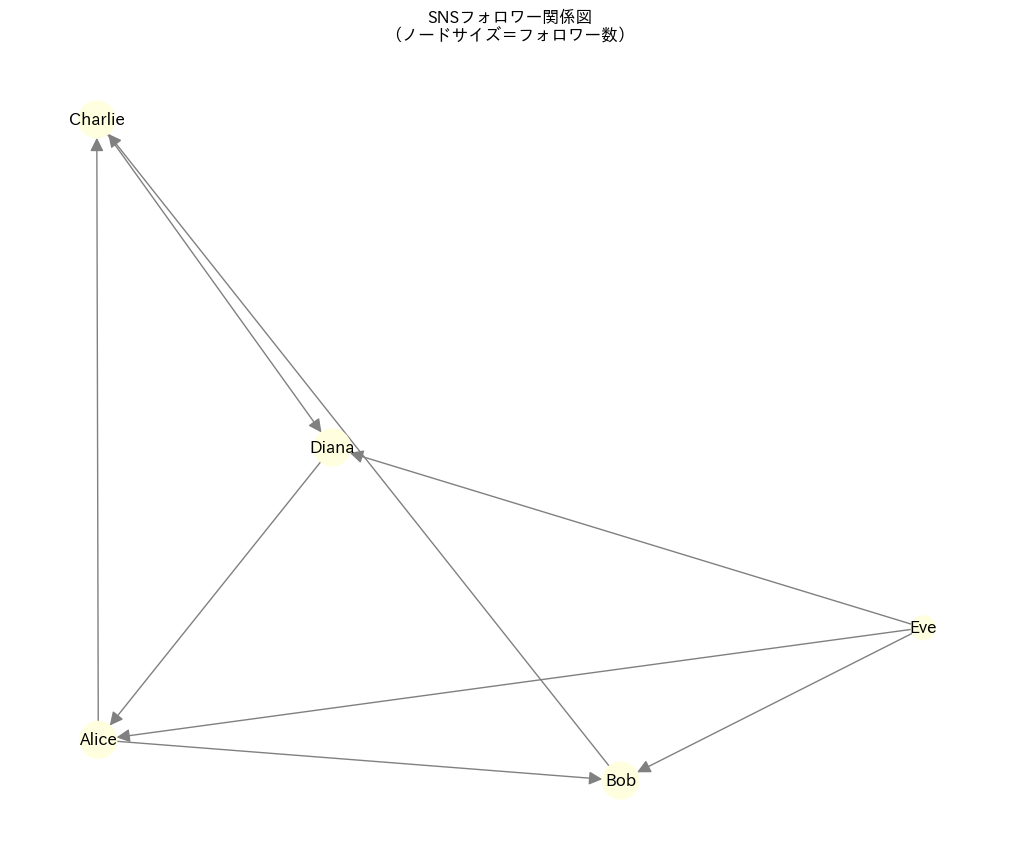

In [36]:
# 可視化
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(sns, seed=42)

# ノードサイズをフォロワー数に比例させる
node_sizes = [300 + sns.in_degree(node) * 200 for node in sns.nodes()]

nx.draw(sns, pos, with_labels=True, node_color='lightyellow',
        node_size=node_sizes, font_size=12, font_weight='bold',
        arrows=True, arrowsize=20, edge_color='gray')
plt.title("SNSフォロワー関係図\n（ノードサイズ＝フォロワー数）")
plt.show()

---
## 例題2: グラフのコピーと変換

In [37]:
# オリジナルグラフの作成
original = nx.complete_graph(4)
print(f"オリジナルのエッジ: {list(original.edges())}")

オリジナルのエッジ: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


In [38]:
# グラフのコピー
copy_graph = original.copy()
copy_graph.remove_edge(0, 1)

print(f"オリジナルのエッジ数: {original.number_of_edges()}")
print(f"コピーのエッジ数: {copy_graph.number_of_edges()}")

オリジナルのエッジ数: 6
コピーのエッジ数: 5


In [39]:
# 無向グラフから有向グラフへの変換
directed = original.to_directed()
print(f"\n無向グラフのエッジ数: {original.number_of_edges()}")
print(f"有向グラフのエッジ数: {directed.number_of_edges()}")
print("（各無向エッジが双方向の2つのエッジになる）")


無向グラフのエッジ数: 6
有向グラフのエッジ数: 12
（各無向エッジが双方向の2つのエッジになる）


In [40]:
# サブグラフの作成
subgraph = original.subgraph([0, 1, 2])
print(f"\nサブグラフのノード: {list(subgraph.nodes())}")
print(f"サブグラフのエッジ: {list(subgraph.edges())}")


サブグラフのノード: [0, 1, 2]
サブグラフのエッジ: [(0, 1), (0, 2), (1, 2)]


---
## 練習問題

### 練習問題1: 学生の履修関係

以下の履修関係をグラフで表現してください。
同じ科目を履修している学生同士をエッジで結びます。

| 学生 | 履修科目 |
|------|----------|
| 鈴木 | 数学, 物理 |
| 佐藤 | 数学, 化学 |
| 田中 | 物理, 化学 |
| 山田 | 数学, 物理, 化学 |

1. 同じ科目を履修している学生同士を結ぶグラフを作成
2. 各学生の「つながり数」を出力
3. グラフを可視化

In [41]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
# 履修データ
courses = {
    "鈴木": ["数学", "物理"],
    "佐藤": ["数学", "化学"],
    "田中": ["物理", "化学"],
    "山田": ["数学", "物理", "化学"]
}

# グラフの作成
G = nx.Graph()
students = list(courses.keys())
G.add_nodes_from(students)

# 同じ科目を履修している学生をエッジで結ぶ
for i, s1 in enumerate(students):
    for s2 in students[i+1:]:
        # 共通科目があればエッジを追加
        common = set(courses[s1]) & set(courses[s2])
        if common:
            G.add_edge(s1, s2, common_courses=list(common))

# 各学生のつながり数
print("=== 各学生のつながり数 ===")
for student in students:
    print(f"{student}: {G.degree(student)}人")

# エッジの詳細
print("\n=== 共通科目でつながる学生 ===")
for u, v, data in G.edges(data=True):
    print(f"{u} - {v}: {data['common_courses']}")

# 可視化
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightgreen',
        node_size=2000, font_size=12, font_weight='bold')

# エッジラベル（共通科目数）
edge_labels = {(u, v): len(d['common_courses']) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("学生の履修関係グラフ")
plt.show()
```
</details>

### 練習問題2: ノードの条件付き削除

以下のグラフから、次数が2以下のノードをすべて削除してください。

```python
G = nx.karate_club_graph()
```

1. 削除前のノード数とエッジ数を表示
2. 次数2以下のノードを削除
3. 削除後のノード数とエッジ数を表示

In [42]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
G = nx.karate_club_graph()

print("=== 削除前 ===")
print(f"ノード数: {G.number_of_nodes()}")
print(f"エッジ数: {G.number_of_edges()}")

# 次数2以下のノードを見つける
low_degree_nodes = [node for node, deg in G.degree() if deg <= 2]
print(f"\n次数2以下のノード: {low_degree_nodes}")
print(f"削除対象ノード数: {len(low_degree_nodes)}")

# 削除
G.remove_nodes_from(low_degree_nodes)

print("\n=== 削除後 ===")
print(f"ノード数: {G.number_of_nodes()}")
print(f"エッジ数: {G.number_of_edges()}")
print(f"残ったノード: {list(G.nodes())}")
```
</details>

### 練習問題3: グラフの統計情報

以下のグラフについて、統計情報を計算してください。

```python
G = nx.barabasi_albert_graph(100, 3, seed=42)
```

1. ノード数とエッジ数
2. 平均次数
3. 最大次数と最小次数
4. 次数の分布をヒストグラムで可視化

In [43]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
G = nx.barabasi_albert_graph(100, 3, seed=42)

# 基本統計
print("=== グラフの統計情報 ===")
print(f"ノード数: {G.number_of_nodes()}")
print(f"エッジ数: {G.number_of_edges()}")

# 次数の統計
degrees = [deg for node, deg in G.degree()]
avg_degree = sum(degrees) / len(degrees)
max_degree = max(degrees)
min_degree = min(degrees)

print(f"\n平均次数: {avg_degree:.2f}")
print(f"最大次数: {max_degree}")
print(f"最小次数: {min_degree}")

# 最大次数のノード
max_node = max(G.nodes(), key=lambda x: G.degree(x))
print(f"最大次数のノード: {max_node}")

# 次数分布のヒストグラム
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min_degree, max_degree + 2), 
         edgecolor='black', alpha=0.7)
plt.xlabel('次数')
plt.ylabel('ノード数')
plt.title('Barabási–Albertグラフの次数分布')
plt.axvline(avg_degree, color='red', linestyle='--', label=f'平均: {avg_degree:.2f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
```
</details>

---
## 2.5 章のまとめ

この章では以下を学びました：

1. **ノードの操作**: `add_node()`, `add_nodes_from()`, `remove_node()`
2. **エッジの操作**: `add_edge()`, `add_edges_from()`, `remove_edge()`
3. **グラフの検査**: `has_node()`, `has_edge()`, `degree()`, `neighbors()`
4. **イテレーション**: `nodes()`, `edges()`, `adjacency()`
5. **グラフ変換**: `copy()`, `to_directed()`, `subgraph()`

### 次章の予告
次章では、様々なグラフの種類（有向グラフ、マルチグラフなど）について詳しく学びます。